### Single Layer Perceptron

In [2]:
import tensorflow as tf

pytorch,tensorflow are deep learning frameworks

Hand written digits recognition using deep learning

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
from tensorflow import keras

In [5]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [6]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,sep='\n')

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
x_train[0].shape

(28, 28)

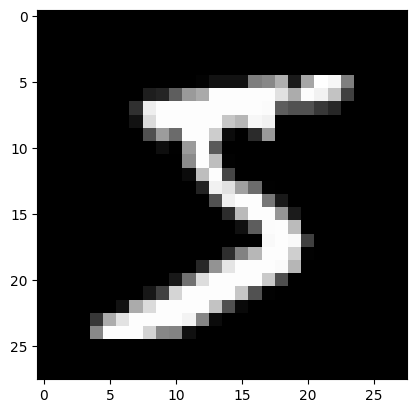

In [8]:
plt.imshow(x_train[0],cmap='gray')
plt.show()

In [9]:
y_train[0]

5

In [10]:
len(x_train)
## represents no.of images in the training data set

60000

In [11]:
print(x_train[0].shape,type(x_train[0].shape),sep='\n')

(28, 28)
<class 'tuple'>


In [12]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [13]:
print(x_train_flatten.shape,x_test_flatten.shape,sep='\n')

(60000, 784)
(10000, 784)


training the model without data scaling or data normalisation

In [ ]:
model=keras.Sequential() ##created a sequential model
## it has 784 values as input.
## every neuron in the next layer has 784 input values. so while describing the first layer(non input layer) we 
## need to specify the input_shape parameter

In [15]:
model = keras.Sequential([ 
	keras.layers.Dense(10, input_shape=(784,), 
					activation='sigmoid') 
]) 
model.compile( 
	optimizer='adam', 
	loss='sparse_categorical_crossentropy', 
	metrics=['accuracy']) 

model.fit(x_train_flatten, y_train, epochs=5) 


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 9.5236 - accuracy: 0.8438
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.9356 - accuracy: 0.8805
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.7662 - accuracy: 0.8836
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.5638 - accuracy: 0.8871
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3440 - accuracy: 0.8875


In [16]:
y_pred=model.predict(x_test_flatten)

313/313 [==============================] - 0s 863us/step


In [17]:
model.evaluate(x_test_flatten, y_test) 

313/313 [==============================] - 0s 1ms/step - loss: 5.6052 - accuracy: 0.8946


[5.605197429656982, 0.894599974155426]

In [18]:
y_test[0]

7

In [19]:
y_pred[0]

array([1.8615994e-17, 0.0000000e+00, 3.8919058e-21, 1.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [20]:
y_pred_val=np.argmax(y_pred,axis=1)

In [21]:
y_pred_val[0]

3

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
cm=confusion_matrix(y_test,y_pred_val)

In [24]:
print(cm)

[[ 975    0    0    2    1    1    0    0    1    0]
 [   0 1130    4    0    0    1    0    0    0    0]
 [ 116  258  646    5    7    0    0    0    0    0]
 [  48   69  546  346    0    1    0    0    0    0]
 [  43   33  143  117  640    0    1    0    4    1]
 [ 139   22  280  208   60  179    2    0    2    0]
 [ 112   37  751    6   18   29    5    0    0    0]
 [  81   48  236  570   54   25    0   13    0    1]
 [  54  128  575  131   36   45    0    1    4    0]
 [  27   31   56  493  362   12    0   18    2    8]]


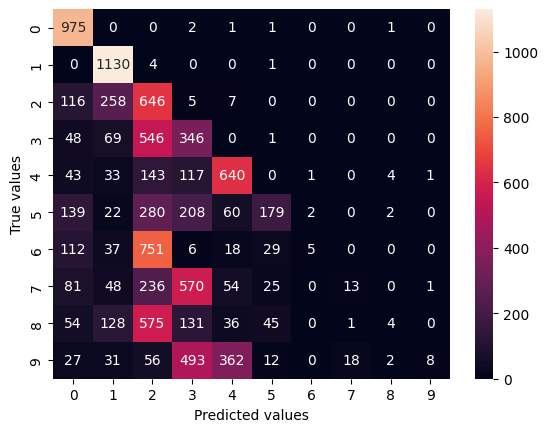

In [25]:
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.show()

training the model with data normalisation

In [26]:
x_train_flatten=x_train_flatten/255
x_test_flatten=x_test_flatten/255

In [27]:
model.fit(x_train_flatten, y_train, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2765 - accuracy: 0.8218
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8922 - accuracy: 0.8708
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6174 - accuracy: 0.8846
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4517 - accuracy: 0.8971
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3603 - accuracy: 0.9066


In [28]:
y_pred1=model.predict(x_test_flatten)

313/313 [==============================] - 0s 863us/step


In [29]:
y_pred1_val=np.argmax(y_pred1,axis=1)

In [30]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.9142


[0.32084864377975464, 0.9142000079154968]

In [31]:
cm=confusion_matrix(y_test,y_pred1_val)

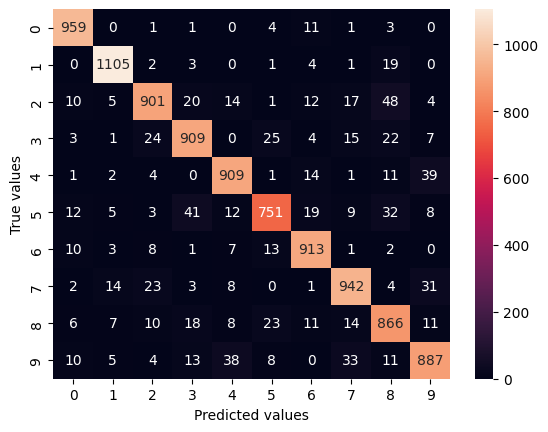

In [32]:
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.show()